# 1. Comenzaremos con el analisis de la primera encuesta

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import re

<font color=navy>**Cargamos la base de datos para la primera encuesta realizada.**</font>  <br>


In [2]:
encuesta_1 = pd.read_excel("1era encuesta COVID.xlsx")

<font color=navy>**Para observar que contiene la base, haremos uso del codigo .head().**</font>  <br>

In [3]:
encuesta_1.head()

,Fecha,¿Qué edad tiene?,¿Con qué genero se identifica?,¿A qué universidad pertenece?,¿En qué departamento se encuentra en este momento?,¿Se encuentra actualmente viviendo sólo (a)?,¿Cuál es su peso en kilogramos (kg)? Si no lo conoce exactamente escriba un aproximado.,¿Cuál es su estatura en centímetros (ejemplo 180) ? Si no lo conoce exactamente escriba un aproximado.,Masa Corporal,¿A qué estrato pertenece?,...,"En un promedio semanal, ¿Cuántos domicilios pide al día?","En un promedio semanal, ¿Cuántos días a la semana suele beber alcohol?","En un promedio semanal, ¿Cuántas horas al día dedica a hacer ejercicio?","Teniendo en cuenta la información anteriormente contestada, en una escala de 1 a 5 donde 1 es muy malo y 5 muy bueno ¿Cómo calificaría su bienestar físico actualmente? Incluyendo alimentación, sueño, actividad física ,entre otros.",¿Cuántas comidas solía consumir al dí­a normalmente? Incluyendo refrigerios y/o meriendas.,¿Cuántas horas solí­a dormir al dí­a normalmente? Incluyendo siestas a lo largo del día.,"En un promedio semanal, ¿Cuántas veces al dÃ­a solí­a comer en establecimientos o pedir domicilios?","En un promedio semanal, ¿Cuántos días a la semana solía beber alcohol?","En un promedio semanal, ¿Cuántas horas al día dedicaba a hacer ejercicio? Incluyendo deporte y actividad física.","Teniendo en cuenta la información anteriormente contestada, en una escala de 1 a 5 donde 1 es muy malo y 5 muy bueno ¿Cómo calificarí­a su bienestar físico antes de la cuarentena obligatoria nacional? Incluyendo alimentación, sueño, actividad física, entre otros."
0,2020-03-28,18,Mujer,Universidad del Rosario,Cundinamarca,No,50,160,19.531250,3,...,0,0,1,4,5,6,2,0,1,4
1,2020-03-28,23,Hombre,Universidad del Rosario,Bogotá D.C.,No,66,169,23.108435,4,...,1,1,5,3,6,5,1,3,2,2
2,2020-03-28,22,Hombre,Universidad del Rosario,Bogotá D.C.,No,67,169,23.458562,3,...,3,1,3,4,5,7,5,3,6,4
3,2020-03-28,21,Hombre,Universidad del Rosario,Cundinamarca,No,112,175,36.571429,4,...,0,0,0,2,4,1,4,0,1,3
4,2020-03-28,20,Hombre,Universidad del Rosario,Bogotá D.C.,No,74,180,22.839506,4,...,1,0,8,4,4,7,6,2,12,4


<font color=navy>**Para saber exactamente cuantas filas y cuantas columnas tiene la primera encuesta usamos**</font>  <br>

In [4]:
print("El número de filas y de columnas  de la 1era encuesta son:",encuesta_1.shape, "respectivamente")

El número de filas y de columnas  de la 1era encuesta son: (350, 22) respectivamente


<font color=navy>**Para ver los nombres de cada columna usaremos .columns**</font>  <br>



In [5]:
encuesta_1.columns

Index(['Fecha', '¿Qué edad tiene?', '¿Con qué genero se identifica?',
       '¿A qué universidad pertenece?',
       '¿En qué departamento se encuentra en este momento?',
       '¿Se encuentra actualmente viviendo sólo (a)?',
       '¿Cuál es su peso en kilogramos (kg)? Si no lo conoce exactamente escriba un aproximado.',
       '¿Cuál es su estatura en centímetros (ejemplo 180) ? Si no lo conoce exactamente escriba un aproximado.',
       'Masa Corporal', '¿A qué estrato pertenece?',
       '¿Cuántas comidas consume al día? Incluyendo refrigerios y/o meriendas.',
       '¿Cuántas horas duerme al día? Incluyendo siestas a lo largo del día.',
       'En un promedio semanal, ¿Cuántos domicilios pide al día?',
       'En un promedio semanal, ¿Cuántos días a la semana suele beber alcohol?',
       'En un promedio semanal, ¿Cuántas horas al día dedica a hacer ejercicio?',
       'Teniendo en cuenta la información anteriormente contestada, en una escala de 1 a 5 donde 1 es muy malo y 5 muy b

<font color=navy>**Para cambiar los nombres de cada columna usaremos .columns**</font>  <br>



In [6]:
encuesta_1.columns = ["Fecha","Edad", "Genero", "Universidad", "Departamento", "Vive_solo", "Peso",
                      "Estatura","Masa_Corporal", "Estrato", "Numero_comidas","Horas_sueño", "Domicilios", 
                      "Alcohol_dia","Ejercicio", "Bienestar", "Comidas_antes","Sueño_antes", "Domicilios_antes", 
                      "Alcohol_antes","Ejercicio_antes", "Bienestar_antes"]
encuesta_1

,Fecha,Edad,Genero,Universidad,Departamento,Vive_solo,Peso,Estatura,Masa_Corporal,Estrato,...,Domicilios,Alcohol_dia,Ejercicio,Bienestar,Comidas_antes,Sueño_antes,Domicilios_antes,Alcohol_antes,Ejercicio_antes,Bienestar_antes
0,2020-03-28,18,Mujer,Universidad del Rosario,Cundinamarca,No,50,160,19.531250,3,...,0,0,1,4,5,6,2,0,1,4
1,2020-03-28,23,Hombre,Universidad del Rosario,Bogotá D.C.,No,66,169,23.108435,4,...,1,1,5,3,6,5,1,3,2,2
2,2020-03-28,22,Hombre,Universidad del Rosario,Bogotá D.C.,No,67,169,23.458562,3,...,3,1,3,4,5,7,5,3,6,4
3,2020-03-28,21,Hombre,Universidad del Rosario,Cundinamarca,No,112,175,36.571429,4,...,0,0,0,2,4,1,4,0,1,3
4,2020-03-28,20,Hombre,Universidad del Rosario,Bogotá D.C.,No,74,180,22.839506,4,...,1,0,8,4,4,7,6,2,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,2020-03-28,20,Mujer,Universidad del Rosario,Cundinamarca,No,49,156,20.134780,2,...,0,0,2,3,3,0,1,0,5,4
346,2020-03-28,21,Hombre,Universidad del Rosario,Bogotá D.C.,Sí,73,180,22.530864,5,...,0,1,2,4,5,6,0,1,2,4
347,2020-03-28,20,Mujer,Universidad del Rosario,Bogotá D.C.,No,45,155,18.730489,3,...,0,0,0,4,4,6,2,0,0,4
348,2020-03-28,21,Hombre,Universidad Santo Tomás,Bogotá D.C.,No,68,174,22.460034,4,...,0,2,1,4,3,7,1,2,1,4


<font color=navy>**Para conocer el tipo de cada variable**</font>  <br>

In [7]:
encuesta_1.dtypes

Fecha               datetime64[ns]
Edad                         int64
Genero                      object
Universidad                 object
Departamento                object
Vive_solo                   object
Peso                         int64
Estatura                     int64
Masa_Corporal              float64
Estrato                      int64
Numero_comidas               int64
Horas_sueño                  int64
Domicilios                   int64
Alcohol_dia                  int64
Ejercicio                    int64
Bienestar                    int64
Comidas_antes                int64
Sueño_antes                  int64
Domicilios_antes             int64
Alcohol_antes                int64
Ejercicio_antes              int64
Bienestar_antes              int64
dtype: object

<font color=navy>**Para observar las caracteristicas básicas de esta encuesta**</font>  <br>


In [8]:
encuesta_1.describe()

,Edad,Peso,Estatura,Masa_Corporal,Estrato,Numero_comidas,Horas_sueño,Domicilios,Alcohol_dia,Ejercicio,Bienestar,Comidas_antes,Sueño_antes,Domicilios_antes,Alcohol_antes,Ejercicio_antes,Bienestar_antes
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,20.700000,62.271429,166.422857,22.415037,3.291429,4.505714,7.731429,0.628571,0.577143,1.682857,3.385714,4.308571,6.234286,2.097143,0.974286,2.368571,3.360000
std,3.867986,11.031501,9.345857,3.053735,0.896146,1.026146,2.075063,1.023666,1.193844,1.778410,0.799227,1.180882,1.850260,2.054206,1.108406,2.975282,0.903099
min,16.000000,40.000000,147.000000,16.358025,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19.000000,54.000000,160.000000,20.324438,3.000000,4.000000,7.000000,0.000000,0.000000,0.000000,3.000000,3.000000,5.000000,1.000000,0.000000,0.000000,3.000000
50%,20.000000,60.000000,165.000000,22.151023,3.000000,5.000000,8.000000,0.000000,0.000000,1.000000,3.000000,4.000000,6.000000,1.500000,1.000000,1.000000,3.000000
75%,21.000000,70.000000,172.000000,23.875115,4.000000,5.000000,9.000000,1.000000,1.000000,2.000000,4.000000,5.000000,7.000000,3.000000,1.000000,3.000000,4.000000
max,61.000000,112.000000,194.000000,36.571429,6.000000,10.000000,13.000000,7.000000,7.000000,8.000000,5.000000,10.000000,12.000000,12.000000,7.000000,17.000000,5.000000


## Para la visualización de datos

<font color=navy>**Genero**</font>  <br>


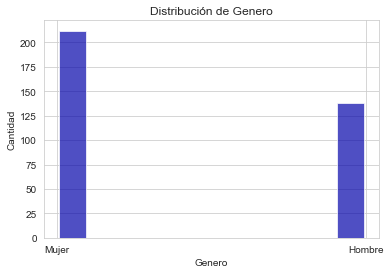

In [26]:
n, bins, patches = plt.hist(encuesta_1["Genero"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.xlabel("Genero")
plt.ylabel("Cantidad")
plt.title("Distribución de Genero")
plt.show()

In [10]:
encuesta_1["Genero"].value_counts()

Mujer     212
Hombre    138
Name: Genero, dtype: int64

<font color=navy>**Vive solo**</font>  <br>


In [11]:
encuesta_1["Vive_solo"].value_counts()

No    332
Sí     18
Name: Vive_solo, dtype: int64

Text(0.5, 1.0, 'Porcentajes de personas que viven solos')

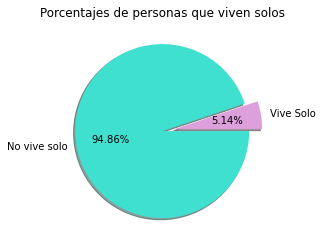

In [13]:
Vivienda = ["Vive Solo", "No vive solo"]
Valores = [18,332]
Colores = ['plum','turquoise']
Explode_vals = [0.15,0]

plt.pie(x = Valores, labels = Vivienda, colors = Colores, autopct='%1.2f%%', shadow=True, explode = Explode_vals)
 
plt.title('Porcentajes de personas que viven solos')
 

<font color=navy>**Edad**</font>  <br>

/Users/lauravillamil/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.8 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Gráfico de densidad Edad')

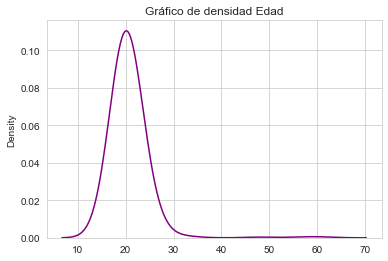

In [14]:
sns.set_style('whitegrid')
ax1 = sns.kdeplot(np.array(encuesta_1["Edad"]), bw=0.8, color = "purple")
ax1.set_title("Gráfico de densidad Edad")

<font color=navy>**Departamento**</font>  <br>

In [15]:
encuesta_1["Departamento"].value_counts()

Bogotá D.C.           257
Cundinamarca           50
Casanare                9
Antioquia               6
Meta                    6
Valle                   4
Norte De Santander      3
Boyacá                  3
Santander               2
Cesar                   2
Nariño                  2
Tolima                  2
Quindí­o                1
Huila                   1
Magdalena               1
Caquetá                 1
Name: Departamento, dtype: int64

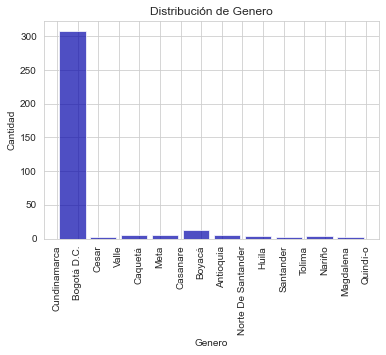

In [16]:
Dpto = ["Bogotá D.C.", "Cundinamarca", "Casanare", "Meta", "Antioquia"]
n, bins, patches = plt.hist(encuesta_1["Departamento"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.xlabel("Genero")
plt.ylabel("Cantidad")
plt.title("Distribución de Genero")
plt.xticks(rotation=90)
plt.show()

<font color=navy>**Universidad**</font>  <br>

In [17]:
encuesta_1["Universidad"].value_counts()

Universidad del Rosario                                     169
Universidad Militar Nueva Granada                            23
Universidad Santo Tomás                                      22
Universidad Nacional de Colombia                             19
Universidad de los Andes                                     18
Universidad de Bogotá Jorge Tadeo Lozano                     16
Universidad Distrital Francisco José de Caldas               14
Universidad Externado de Colombia                             8
Universidad El Bosque                                         7
Universidad Central                                           7
Pontificia Universidad Javeriana                              6
Universidad Libre                                             6
Fundación Universitaria Juan N. Corpas                        5
Universidad de La Salle                                       4
Universidad del Área Andina                                   4
Universidad Católica de Colombia        

# 1. Seguiremos con el analisis de la segunda encuesta

<font color=navy>**Ahora para cargar la segunda base de datos que contiene lo recogido en la segunda encuesta**</font>  <br>


In [18]:
encuesta_2 = pd.read_excel("2da encuesta COVID.xlsx")

<font color=navy>**Al igual que con la anterior base, observamos los datos**</font>  <br>


In [19]:
encuesta_2.head()

,Fecha,¿Qué edad tiene?,¿Con qué genero se identifica?,¿A qué universidad pertenece?,¿En qué departamento se encuentra en este momento?,¿Se encuentra actualmente viviendo sólo (a)?,¿Cuál es su peso en kilogramos (kg)? Si no lo conoce exactamente escriba un aproximado.,¿Cuál es su estatura en centímetros (ejemplo 180) ? Si no lo conoce exactamente escriba un aproximado.,Masa Corporal,¿A qué estrato pertenece?,¿Cuántas comidas consume al día? Incluyendo refrigerios y/o meriendas.,¿Cuántas horas duerme al día? Incluyendo siestas a lo largo del día.,"En un promedio semanal, ¿Cuántos domicilios pide al día?","En un promedio semanal, ¿Cuántos días a la semana suele beber alcohol?","En un promedio semanal, ¿Cuántas horas al día dedica a hacer ejercicio?","Teniendo en cuenta la información anteriormente contestada, en una escala de 1 a 5 donde 1 es muy malo y 5 muy bueno ¿Cómo calificaría su bienestar físico actualmente? Incluyendo alimentación, sueño, actividad física ,entre otros."
0,2020-04-11,20,Mujer,Universidad del Rosario,Meta,No,66,159,26.106562,3,5,10,1.0,0.0,2.0,5
1,2020-04-11,21,Hombre,Universidad del Rosario,Bogotá D.C.,Sí,70,170,24.221453,3,4,9,2.0,2.0,2.0,2
2,2020-04-11,21,Hombre,Universidad Militar Nueva Granada,Cundinamarca,No,68,174,22.460034,5,3,7,0.0,2.0,2.0,4
3,2020-04-11,20,Hombre,Universidad del Rosario,Bogotá D.C.,No,63,172,21.295295,4,4,8,0.0,1.0,0.0,3
4,2020-04-11,21,Hombre,Universidad del Rosario,Bogotá D.C.,No,55,179,17.165507,3,6,8,0.0,0.0,7.0,3


<font color=navy>**Para saber exactamente cuantas filas y cuantas columnas tiene la segunda encuesta usamos**</font>  <br>

In [20]:
print("El número de filas y de columnas  de la 2da encuesta son:",encuesta_2.shape, "respectivamente")

El número de filas y de columnas  de la 2da encuesta son: (195, 16) respectivamente


<font color=navy>**Para ver los nombres de cada columna usaremos .columns**</font>  <br>


In [21]:
encuesta_2.columns

Index(['Fecha', '¿Qué edad tiene?', '¿Con qué genero se identifica?',
       '¿A qué universidad pertenece?',
       '¿En qué departamento se encuentra en este momento?',
       '¿Se encuentra actualmente viviendo sólo (a)?',
       '¿Cuál es su peso en kilogramos (kg)? Si no lo conoce exactamente escriba un aproximado.',
       '¿Cuál es su estatura en centímetros (ejemplo 180) ? Si no lo conoce exactamente escriba un aproximado.',
       'Masa Corporal', '¿A qué estrato pertenece?',
       '¿Cuántas comidas consume al día? Incluyendo refrigerios y/o meriendas.',
       '¿Cuántas horas duerme al día? Incluyendo siestas a lo largo del día.',
       'En un promedio semanal, ¿Cuántos domicilios pide al día?',
       'En un promedio semanal, ¿Cuántos días a la semana suele beber alcohol?',
       'En un promedio semanal, ¿Cuántas horas al día dedica a hacer ejercicio?',
       'Teniendo en cuenta la información anteriormente contestada, en una escala de 1 a 5 donde 1 es muy malo y 5 muy b

<font color=navy>**Asi como en el anterior ejercicio cambiares los nombres de cada columna por facilidad**</font>  <br>


In [22]:
encuesta_2.columns = ["Fecha","Edad", "Genero","Universidad","Departamento", "Vive_solo", "Peso",
                      "Estatura","Masa_Corporal", "Estrato", "Numero_comidas","Horas_sueño", "Domicilios", 
                      "Alcohol_dia","Ejercicio", "Bienestar"]
encuesta_2

,Fecha,Edad,Genero,Universidad,Departamento,Vive_solo,Peso,Estatura,Masa_Corporal,Estrato,Numero_comidas,Horas_sueño,Domicilios,Alcohol_dia,Ejercicio,Bienestar
0,2020-04-11,20,Mujer,Universidad del Rosario,Meta,No,66,159,26.106562,3,5,10,1.0,0.0,2.0,5
1,2020-04-11,21,Hombre,Universidad del Rosario,Bogotá D.C.,Sí,70,170,24.221453,3,4,9,2.0,2.0,2.0,2
2,2020-04-11,21,Hombre,Universidad Militar Nueva Granada,Cundinamarca,No,68,174,22.460034,5,3,7,0.0,2.0,2.0,4
3,2020-04-11,20,Hombre,Universidad del Rosario,Bogotá D.C.,No,63,172,21.295295,4,4,8,0.0,1.0,0.0,3
4,2020-04-11,21,Hombre,Universidad del Rosario,Bogotá D.C.,No,55,179,17.165507,3,6,8,0.0,0.0,7.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2020-04-11,21,Mujer,Universidad del Rosario,Cesar,No,63,170,21.799308,4,5,7,0.0,0.0,1.0,4
191,2020-04-11,19,Mujer,Universidad del Rosario,Bogotá D.C.,No,57,163,21.453574,3,4,5,0.0,0.0,4.0,3
192,2020-04-11,20,Mujer,Universidad del Rosario,Bogotá D.C.,No,53,160,20.703125,4,6,8,0.0,0.0,4.0,3
193,2020-04-11,18,Mujer,Universidad del Rosario,Bogotá D.C.,No,68,168,24.092971,4,4,1,1.0,1.0,1.0,3


<font color=navy>**Para conocer el tipo de cada variable**</font>  <br>

In [23]:
encuesta_2.dtypes

Fecha             datetime64[ns]
Edad                       int64
Genero                    object
Universidad               object
Departamento              object
Vive_solo                 object
Peso                       int64
Estatura                   int64
Masa_Corporal            float64
Estrato                    int64
Numero_comidas             int64
Horas_sueño                int64
Domicilios               float64
Alcohol_dia              float64
Ejercicio                float64
Bienestar                  int64
dtype: object

<font color=navy>**Para observar las caracteristicas básicas de esta segunda encuesta**</font>  <br>


In [24]:
encuesta_2.describe()

,Edad,Peso,Estatura,Masa_Corporal,Estrato,Numero_comidas,Horas_sueño,Domicilios,Alcohol_dia,Ejercicio,Bienestar
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,20.379487,64.282051,168.184615,22.601467,3.287179,4.328205,7.707692,0.837436,0.550256,1.895897,3.420513
std,2.445191,14.408883,9.393284,3.758055,1.069536,1.203506,2.227220,1.362867,0.947181,1.759125,0.804363
min,17.000000,40.000000,148.000000,16.528926,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19.000000,55.000000,160.000000,20.369832,3.000000,3.000000,7.000000,0.000000,0.000000,1.000000,3.000000
50%,20.000000,63.000000,168.000000,22.038567,3.000000,4.000000,8.000000,0.000000,0.000000,2.000000,3.000000
75%,21.000000,69.000000,175.000000,24.188784,4.000000,5.000000,9.000000,1.000000,1.000000,2.000000,4.000000
max,37.000000,180.000000,203.000000,56.178022,6.000000,10.000000,14.000000,8.000000,6.000000,8.000000,5.000000


## Para la visualización de datos


<font color=navy>**Genero**</font>  <br>


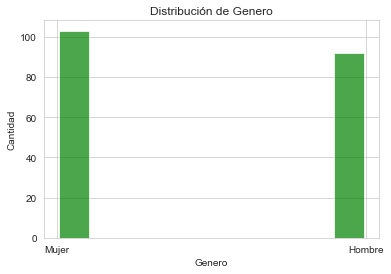

In [29]:
n, bins, patches = plt.hist(encuesta_2["Genero"], bins='auto', color='green',
                            alpha=0.7, rwidth=0.85)
plt.xlabel("Genero")
plt.ylabel("Cantidad")
plt.title("Distribución de Genero")
plt.show()

In [30]:
encuesta_2["Genero"].value_counts()

Mujer     103
Hombre     92
Name: Genero, dtype: int64

<font color=navy>**Vive solo**</font>  <br>


In [31]:
encuesta_2["Vive_solo"].value_counts()

No    187
Sí      8
Name: Vive_solo, dtype: int64

Text(0.5, 1.0, 'Porcentajes de personas que viven solos')

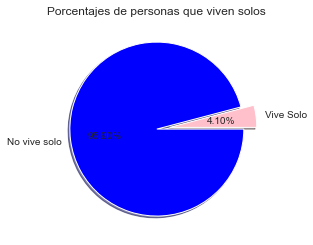

In [32]:
Vivienda = ["Vive Solo", "No vive solo"]
Valores = [8,187]
Colores = ['pink','blue']
Explode_vals = [0.15,0]

plt.pie(x = Valores, labels = Vivienda, colors = Colores, autopct='%1.2f%%', shadow=True, explode = Explode_vals)
 
plt.title('Porcentajes de personas que viven solos')
 

<font color=navy>**Edad**</font>  <br>

/Users/lauravillamil/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.8 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Gráfico de densidad Edad')

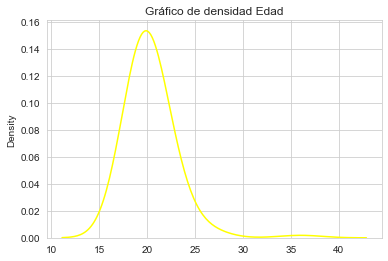

In [33]:
sns.set_style('whitegrid')
ax1 = sns.kdeplot(np.array(encuesta_2["Edad"]), bw=0.8, color = "yellow")
ax1.set_title("Gráfico de densidad Edad")

<font color=navy>**Departamento**</font>  <br>

In [50]:
encuesta_2["Departamento"].value_counts()

Bogotá D.C.           147
Cundinamarca           31
Huila                   2
Norte De Santander      2
Cesar                   2
Tolima                  2
Antioquia               2
Valle                   2
Meta                    1
Amazonas                1
Quindío                 1
Santander               1
Nariño                  1
Name: Departamento, dtype: int64

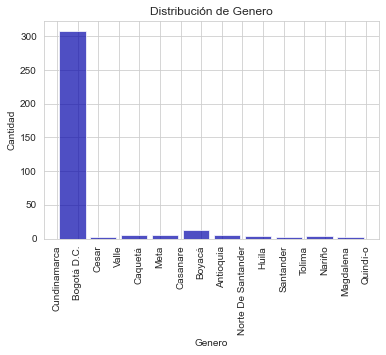

In [35]:
Dpto = ["Bogotá D.C.", "Cundinamarca", "Casanare", "Meta", "Antioquia"]
n, bins, patches = plt.hist(encuesta_1["Departamento"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.xlabel("Genero")
plt.ylabel("Cantidad")
plt.title("Distribución de Genero")
plt.xticks(rotation=90)
plt.show()

<font color=navy>**Universidad**</font>  <br>

In [37]:
encuesta_["Universidad"].value_counts()

Universidad del Rosario                                                                   67
Universidad Distrital Francisco José de Caldas                                            26
Universidad de Bogotá Jorge Tadeo Lozano                                                  15
Pontificia Universidad Javeriana                                                          10
Universidad Santo Tomás                                                                    9
Universidad de Cundinamarca                                                                9
Universidad Militar Nueva Granada                                                          8
Universidad de los Andes                                                                   6
Universidad El Bosque                                                                      3
Universidad Nacional de Colombia                                                           3
Universidad EAN                                                       

# Uniremos las dos encuestas para tener una sola base de datos

<font color=navy>**Para unir las dos bases**</font>  <br>


In [38]:
Base = pd.merge(encuesta_1, encuesta_2, how ="outer", left_on = ["Fecha","Edad", "Genero","Universidad","Departamento", "Vive_solo", "Peso",
                      "Estatura","Masa_Corporal", "Estrato", "Numero_comidas","Horas_sueño", "Domicilios", 
                      "Alcohol_dia","Ejercicio", "Bienestar"], right_on = ["Fecha","Edad", "Genero","Universidad","Departamento", "Vive_solo", "Peso",
                      "Estatura","Masa_Corporal", "Estrato", "Numero_comidas","Horas_sueño", "Domicilios", 
                      "Alcohol_dia","Ejercicio", "Bienestar"])
Base

/Users/lauravillamil/opt/anaconda3/lib/python3.8/site-packages/pandas/core/reshape/merge.py:1151: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  warnings.warn(


,Fecha,Edad,Genero,Universidad,Departamento,Vive_solo,Peso,Estatura,Masa_Corporal,Estrato,...,Domicilios,Alcohol_dia,Ejercicio,Bienestar,Comidas_antes,Sueño_antes,Domicilios_antes,Alcohol_antes,Ejercicio_antes,Bienestar_antes
0,2020-03-28,18,Mujer,Universidad del Rosario,Cundinamarca,No,50,160,19.531250,3,...,0.0,0.0,1.0,4,5.0,6.0,2.0,0.0,1.0,4.0
1,2020-03-28,23,Hombre,Universidad del Rosario,Bogotá D.C.,No,66,169,23.108435,4,...,1.0,1.0,5.0,3,6.0,5.0,1.0,3.0,2.0,2.0
2,2020-03-28,22,Hombre,Universidad del Rosario,Bogotá D.C.,No,67,169,23.458562,3,...,3.0,1.0,3.0,4,5.0,7.0,5.0,3.0,6.0,4.0
3,2020-03-28,21,Hombre,Universidad del Rosario,Cundinamarca,No,112,175,36.571429,4,...,0.0,0.0,0.0,2,4.0,1.0,4.0,0.0,1.0,3.0
4,2020-03-28,20,Hombre,Universidad del Rosario,Bogotá D.C.,No,74,180,22.839506,4,...,1.0,0.0,8.0,4,4.0,7.0,6.0,2.0,12.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,2020-04-11,21,Mujer,Universidad del Rosario,Cesar,No,63,170,21.799308,4,...,0.0,0.0,1.0,4,NaN,NaN,NaN,NaN,NaN,NaN
541,2020-04-11,19,Mujer,Universidad del Rosario,Bogotá D.C.,No,57,163,21.453574,3,...,0.0,0.0,4.0,3,NaN,NaN,NaN,NaN,NaN,NaN
542,2020-04-11,20,Mujer,Universidad del Rosario,Bogotá D.C.,No,53,160,20.703125,4,...,0.0,0.0,4.0,3,NaN,NaN,NaN,NaN,NaN,NaN
543,2020-04-11,18,Mujer,Universidad del Rosario,Bogotá D.C.,No,68,168,24.092971,4,...,1.0,1.0,1.0,3,NaN,NaN,NaN,NaN,NaN,NaN


<font color=navy>**Para conocer el timpo de cada columna**</font>  <br>


In [39]:
Base.dtypes

Fecha               datetime64[ns]
Edad                         int64
Genero                      object
Universidad                 object
Departamento                object
Vive_solo                   object
Peso                         int64
Estatura                     int64
Masa_Corporal              float64
Estrato                      int64
Numero_comidas               int64
Horas_sueño                  int64
Domicilios                 float64
Alcohol_dia                float64
Ejercicio                  float64
Bienestar                    int64
Comidas_antes              float64
Sueño_antes                float64
Domicilios_antes           float64
Alcohol_antes              float64
Ejercicio_antes            float64
Bienestar_antes            float64
dtype: object

<font color=navy>**Para conocer las estadisticas básicas de la base**</font>  <br>


In [40]:
Base.describe()

,Edad,Peso,Estatura,Masa_Corporal,Estrato,Numero_comidas,Horas_sueño,Domicilios,Alcohol_dia,Ejercicio,Bienestar,Comidas_antes,Sueño_antes,Domicilios_antes,Alcohol_antes,Ejercicio_antes,Bienestar_antes
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,20.585321,62.990826,167.053211,22.481741,3.289908,4.442202,7.722936,0.703303,0.567523,1.759083,3.398165,4.308571,6.234286,2.097143,0.974286,2.368571,3.360000
std,3.428439,12.371022,9.392333,3.320707,0.960808,1.095134,2.128744,1.159610,1.111070,1.772864,0.800503,1.180882,1.850260,2.054206,1.108406,2.975282,0.903099
min,16.000000,40.000000,147.000000,16.358025,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19.000000,54.000000,160.000000,20.324438,3.000000,4.000000,7.000000,0.000000,0.000000,0.400000,3.000000,3.000000,5.000000,1.000000,0.000000,0.000000,3.000000
50%,20.000000,61.000000,166.000000,22.115842,3.000000,4.000000,8.000000,0.000000,0.000000,1.000000,3.000000,4.000000,6.000000,1.500000,1.000000,1.000000,3.000000
75%,21.000000,70.000000,174.000000,23.913275,4.000000,5.000000,9.000000,1.000000,1.000000,2.000000,4.000000,5.000000,7.000000,3.000000,1.000000,3.000000,4.000000
max,61.000000,180.000000,203.000000,56.178022,6.000000,10.000000,14.000000,8.000000,7.000000,8.000000,5.000000,10.000000,12.000000,12.000000,7.000000,17.000000,5.000000


## Para la visualización de datos


<font color=navy>**Genero**</font>  <br>


In [42]:
Base["Genero"].value_counts()

Mujer     315
Hombre    230
Name: Genero, dtype: int64

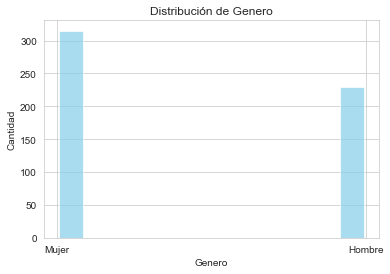

In [44]:
n, bins, patches = plt.hist(Base["Genero"], bins='auto', color='skyblue',
                            alpha=0.7, rwidth=0.85)
plt.xlabel("Genero")
plt.ylabel("Cantidad")
plt.title("Distribución de Genero")
plt.show()

<font color=navy>**Vive solo**</font>  <br>


In [45]:
Base["Vive_solo"].value_counts()

No    519
Sí     26
Name: Vive_solo, dtype: int64

Text(0.5, 1.0, 'Porcentajes de personas que viven solos')

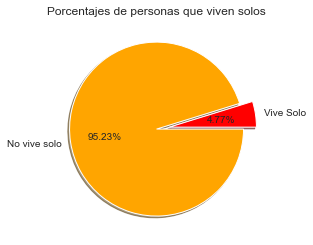

In [47]:
Vivienda = ["Vive Solo", "No vive solo"]
Valores = [26,519]
Colores = ['red','orange']
Explode_vals = [0.15,0]

plt.pie(x = Valores, labels = Vivienda, colors = Colores, autopct='%1.2f%%', shadow=True, explode = Explode_vals)
 
plt.title('Porcentajes de personas que viven solos')

<font color=navy>**Edad**</font>  <br>


/Users/lauravillamil/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.8 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Gráfico de densidad Edad')

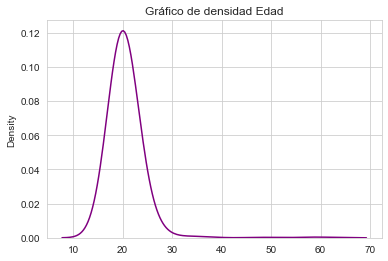

In [49]:
sns.set_style('whitegrid')
ax1 = sns.kdeplot(np.array(Base["Edad"]), bw=0.8, color = "purple")
ax1.set_title("Gráfico de densidad Edad")

In [72]:
Base["Edad"].value_counts()

20    156
19    104
21     91
18     57
22     51
23     29
17     19
24     13
27      7
25      6
26      4
37      1
57      1
48      1
16      1
35      1
33      1
32      1
61      1
Name: Edad, dtype: int64

<font color=navy>**Departamento**</font>  <br>

In [51]:
Base["Departamento"].value_counts()

Bogotá D.C.           404
Cundinamarca           81
Casanare                9
Antioquia               8
Meta                    7
Valle                   6
Norte De Santander      5
Cesar                   4
Tolima                  4
Santander               3
Huila                   3
Boyacá                  3
Nariño                  3
Magdalena               1
Quindí­o                1
Amazonas                1
Caquetá                 1
Quindío                 1
Name: Departamento, dtype: int64

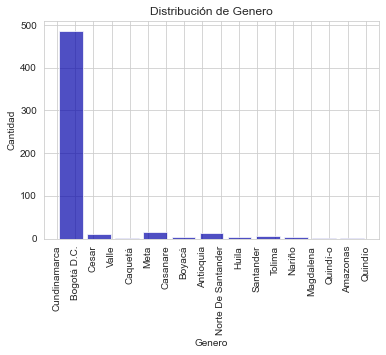

In [52]:
Dpto = ["Bogotá D.C.", "Cundinamarca", "Casanare", "Meta", "Antioquia"]
n, bins, patches = plt.hist(Base["Departamento"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.xlabel("Genero")
plt.ylabel("Cantidad")
plt.title("Distribución de Genero")
plt.xticks(rotation=90)
plt.show()

<font color=navy>**Universidad**</font>  <br>

In [53]:
Base["Universidad"].value_counts()

Universidad del Rosario                                                                   236
Universidad Distrital Francisco José de Caldas                                             40
Universidad Santo Tomás                                                                    31
Universidad Militar Nueva Granada                                                          31
Universidad de Bogotá Jorge Tadeo Lozano                                                   31
Universidad de los Andes                                                                   24
Universidad Nacional de Colombia                                                           22
Pontificia Universidad Javeriana                                                           16
Universidad de Cundinamarca                                                                12
Universidad El Bosque                                                                      10
Universidad Externado de Colombia                           

## Regex Urosario


In [61]:
U_Rosario = Base[Base["Universidad"] == "Universidad del Rosario"]

In [62]:
U_Rosario

,Fecha,Edad,Genero,Universidad,Departamento,Vive_solo,Peso,Estatura,Masa_Corporal,Estrato,...,Domicilios,Alcohol_dia,Ejercicio,Bienestar,Comidas_antes,Sueño_antes,Domicilios_antes,Alcohol_antes,Ejercicio_antes,Bienestar_antes
0,2020-03-28,18,Mujer,Universidad del Rosario,Cundinamarca,No,50,160,19.531250,3,...,0.0,0.0,1.0,4,5.0,6.0,2.0,0.0,1.0,4.0
1,2020-03-28,23,Hombre,Universidad del Rosario,Bogotá D.C.,No,66,169,23.108435,4,...,1.0,1.0,5.0,3,6.0,5.0,1.0,3.0,2.0,2.0
2,2020-03-28,22,Hombre,Universidad del Rosario,Bogotá D.C.,No,67,169,23.458562,3,...,3.0,1.0,3.0,4,5.0,7.0,5.0,3.0,6.0,4.0
3,2020-03-28,21,Hombre,Universidad del Rosario,Cundinamarca,No,112,175,36.571429,4,...,0.0,0.0,0.0,2,4.0,1.0,4.0,0.0,1.0,3.0
4,2020-03-28,20,Hombre,Universidad del Rosario,Bogotá D.C.,No,74,180,22.839506,4,...,1.0,0.0,8.0,4,4.0,7.0,6.0,2.0,12.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,2020-04-11,19,Mujer,Universidad del Rosario,Bogotá D.C.,No,62,170,21.453287,5,...,1.0,0.0,2.0,4,NaN,NaN,NaN,NaN,NaN,NaN
540,2020-04-11,21,Mujer,Universidad del Rosario,Cesar,No,63,170,21.799308,4,...,0.0,0.0,1.0,4,NaN,NaN,NaN,NaN,NaN,NaN
541,2020-04-11,19,Mujer,Universidad del Rosario,Bogotá D.C.,No,57,163,21.453574,3,...,0.0,0.0,4.0,3,NaN,NaN,NaN,NaN,NaN,NaN
542,2020-04-11,20,Mujer,Universidad del Rosario,Bogotá D.C.,No,53,160,20.703125,4,...,0.0,0.0,4.0,3,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
U_Rosario.describe()

,Edad,Peso,Estatura,Masa_Corporal,Estrato,Numero_comidas,Horas_sueño,Domicilios,Alcohol_dia,Ejercicio,Bienestar,Comidas_antes,Sueño_antes,Domicilios_antes,Alcohol_antes,Ejercicio_antes,Bienestar_antes
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,20.521186,63.135593,166.953390,22.603211,3.516949,4.572034,7.707627,0.738559,0.661017,1.891102,3.411017,4.437870,6.224852,2.289941,1.071006,2.408284,3.390533
std,3.743303,10.759590,8.633553,3.138001,0.938383,0.984509,1.981646,1.143639,1.283084,1.865808,0.791259,1.073484,1.632001,2.105538,1.198084,3.014675,0.880425
min,16.000000,42.000000,150.000000,16.358025,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19.000000,55.000000,160.000000,20.533960,3.000000,4.000000,7.000000,0.000000,0.000000,1.000000,3.000000,4.000000,5.000000,1.000000,0.000000,0.000000,3.000000
50%,20.000000,62.000000,165.000000,22.210005,3.000000,5.000000,8.000000,0.000000,0.000000,1.000000,3.000000,4.000000,6.000000,2.000000,1.000000,1.000000,3.000000
75%,21.000000,69.000000,173.250000,23.926565,4.000000,5.000000,9.000000,1.000000,1.000000,2.000000,4.000000,5.000000,7.000000,3.000000,2.000000,3.000000,4.000000
max,61.000000,112.000000,194.000000,36.571429,6.000000,8.000000,14.000000,8.000000,7.000000,8.000000,5.000000,7.000000,11.000000,12.000000,5.000000,14.000000,5.000000


In [65]:
U_Rosario["Genero"].value_counts()

Mujer     142
Hombre     94
Name: Genero, dtype: int64

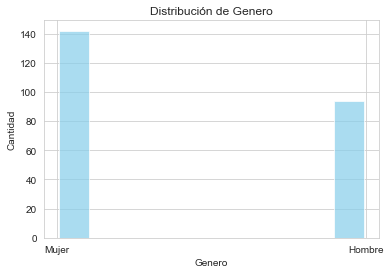

In [66]:
n, bins, patches = plt.hist(U_Rosario["Genero"], bins='auto', color='skyblue',
                            alpha=0.7, rwidth=0.85)
plt.xlabel("Genero")
plt.ylabel("Cantidad")
plt.title("Distribución de Genero")
plt.show()

In [67]:
U_Rosario["Vive_solo"].value_counts()

No    223
Sí     13
Name: Vive_solo, dtype: int64

Text(0.5, 1.0, 'Porcentajes de personas que viven solos')

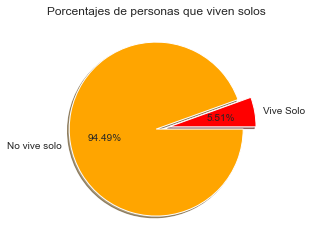

In [68]:
Vivienda = ["Vive Solo", "No vive solo"]
Valores = [13,223]
Colores = ['red','orange']
Explode_vals = [0.15,0]

plt.pie(x = Valores, labels = Vivienda, colors = Colores, autopct='%1.2f%%', shadow=True, explode = Explode_vals)
 
plt.title('Porcentajes de personas que viven solos')

/Users/lauravillamil/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.8 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Gráfico de densidad Edad')

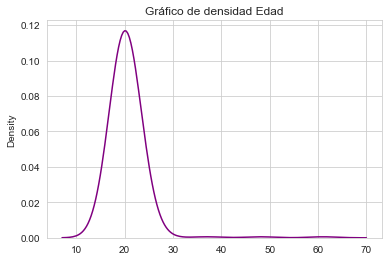

In [70]:
sns.set_style('whitegrid')
ax1 = sns.kdeplot(np.array(U_Rosario["Edad"]), bw=0.8, color = "purple")
ax1.set_title("Gráfico de densidad Edad")

In [71]:
U_Rosario["Edad"].value_counts()

20    79
21    47
19    39
18    23
22    18
23    10
17     8
24     4
25     3
16     1
26     1
37     1
48     1
61     1
Name: Edad, dtype: int64

In [73]:
U_Rosario["Departamento"].value_counts()

Bogotá D.C.           176
Cundinamarca           29
Cesar                   4
Tolima                  4
Valle                   4
Norte De Santander      3
Nariño                  3
Antioquia               3
Casanare                2
Meta                    2
Santander               2
Boyacá                  2
Magdalena               1
Caquetá                 1
Name: Departamento, dtype: int64